<a href="https://colab.research.google.com/github/saileshraturi/CNN-over-CIFAR10/blob/master/CNN_over_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,GlobalMaxPool2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model

In [0]:
CIFAR10 = tf.keras.datasets.cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = CIFAR10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
print(x_train.shape)

(50000, 32, 32, 3)


In [5]:
x_train,x_test = x_train/255.0,x_test/255.0
y_train,y_test = y_train.flatten(),y_test.flatten()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [7]:
#total labels

k = len(set(y_train))
print(k)


10


In [0]:
#Build the model
i = Input(x_train[0].shape)
x = Conv2D(32, (3,3),activation='relu',padding ='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3),activation='relu',padding ='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3),activation='relu',padding ='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding ='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3),activation='relu',padding ='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu',padding ='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)


x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k,activation='softmax')(x)

model = Model(i,x)

In [46]:
#Fit with Data Augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch,epochs = 50)


Epoch 1/50
1562/1562 [==============================] - 25s 16ms/step - loss: 1.5093 - accuracy: 0.4664 - val_loss: 1.1238 - val_accuracy: 0.6017
Epoch 2/50
1562/1562 [==============================] - 24s 16ms/step - loss: 1.0666 - accuracy: 0.6286 - val_loss: 0.9987 - val_accuracy: 0.6549
Epoch 3/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.8783 - accuracy: 0.6979 - val_loss: 0.9568 - val_accuracy: 0.6849
Epoch 4/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.7761 - accuracy: 0.7347 - val_loss: 0.7818 - val_accuracy: 0.7351
Epoch 5/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6974 - accuracy: 0.7646 - val_loss: 1.1419 - val_accuracy: 0.6616
Epoch 6/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6443 - accuracy: 0.7823 - val_loss: 0.7064 - val_accuracy: 0.7649
Epoch 7/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.5982 - accuracy: 0.7986 - val_loss: 0.6454 -

In [0]:
#compile and fit the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#r = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs = 15)

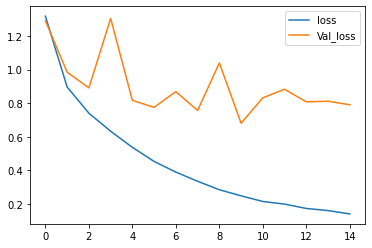

In [34]:
#Visualizing Loss and accuracy
plt.plot(r.history['loss'],label ='loss')
plt.plot(r.history['val_loss'],label = 'Val_loss')
plt.legend()


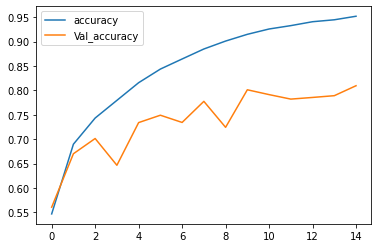

In [35]:
plt.plot(r.history['accuracy'],label ='accuracy')
plt.plot(r.history['val_accuracy'],label = 'Val_accuracy')
plt.legend()

In [0]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

confusion matrix without normalization
[[899  10  19  11   6   3  11   3  29   9]
 [  7 931   2   3   0   0   6   0  17  34]
 [ 64   4 689  64  41  41  64  15  14   4]
 [ 30   2  43 638  32 136  70  26  17   6]
 [ 17   7  49  58 763  24  46  27   9   0]
 [ 15   3  19 124  34 743  28  28   5   1]
 [  5   2  21  33  14  17 899   1   8   0]
 [ 22   2  16  34  37  42   7 825   6   9]
 [ 49  18   8  10   2   2   4   1 902   4]
 [ 38  83   9  10   5   4   8   3  33 807]]


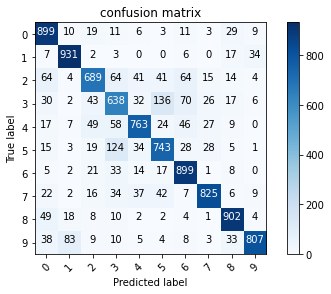

In [37]:
def plot_confusion_matrix(cm,classes,
                          normalize = False,
                          title = 'confusion matrix',
                          cmap =plt.cm.Blues):
  #This function print and plot the confusion matrix
  if normalize:
      cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('confusion matrix without normalization')
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  fmt ='.2f' if normalize else 'd'
  thresh = cm.max() / 2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j],fmt),
               horizontalalignment='center',
               color = 'white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

p_test = model.predict(x_test).argmax(axis =1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [0]:
#Label Mapping
labels = ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck '''.split()

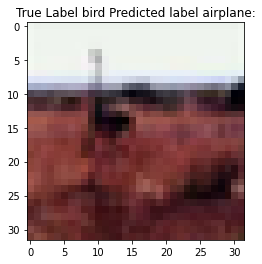

In [40]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True Label %s Predicted label %s:"% (labels[y_test[i]],labels[p_test[i]]));